#a visualization of an astrophysical simulation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

read in density file

In [3]:
fname = "density_projection.dat"
d = np.fromfile(fname, dtype=np.float32)
d = np.reshape(d,(512,512))

repeat for energy file

In [4]:
fname = "energy_projection.dat"
energy = np.fromfile(fname, dtype=np.float32)
energy = np.reshape(energy,(512,512)) #512 by 512 matrix, can use imshow to plot to screen


plot using default color map

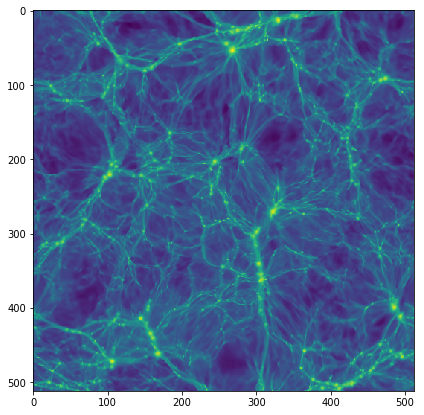

In [5]:
d_log = np.log10(d)
f = plt.figure(figsize=(7,7))
plt.imshow(d_log)

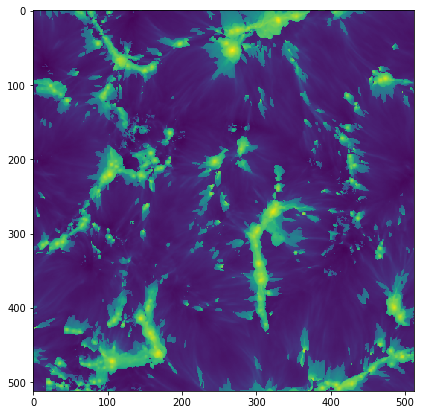

In [6]:
e_log =np.log10(energy)
f = plt.figure(figsize=(7,7))
plt.imshow(e_log)

making a 3 color image, combine density and energy into map. Map density to V and S, and energy to H

In [7]:
d_min = d_log.min()
d_max = d_log.max()

v = (d_log - d_min)/(d_max - d_min)
s = 1.0 - v
#red = 0

In [16]:
e_min = e_log.min()
e_max = e_log.max()

#h = 0.8 - 0.2*(e_log - e_min)/(e_max - e_min)
#print(h)
h = 0.0 + 0.18*(e_log - e_min)/(e_max - e_min)

now we make a HSV image and convert to RGB

In [17]:
hsv_image = np.zeros((512,512,3))
hsv_image[:,:,0] = h
hsv_image[:,:,1] = s
hsv_image[:,:,2] = v

rgb_image = colors.hsv_to_rgb(hsv_image)

see 3 color image

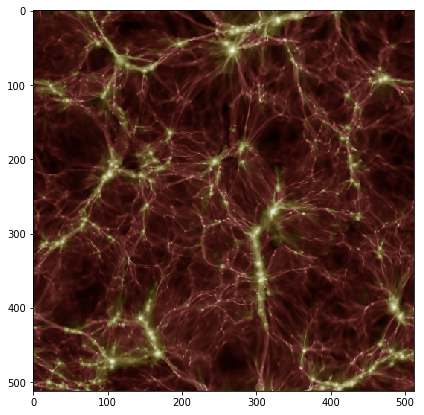

In [18]:
f = plt.figure(figsize=(7,7))
plt.imshow(rgb_image)

In [19]:
plt.imsave("test.png", rgb_image)